In [1]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a, b, x): return a * x + b

In [3]:
a = 3.0
b = 8.0

In [4]:
n = 30
x = random(n)
y = lin(a, b, x)

In [5]:
x

array([ 0.936 ,  0.4151,  0.1955,  0.5671,  0.4543,  0.8393,  0.5504,  0.9799,  0.8376,  0.576 ,
        0.9993,  0.1309,  0.8194,  0.7911,  0.887 ,  0.2029,  0.9565,  0.164 ,  0.2924,  0.8179,
        0.1816,  0.7341,  0.0704,  0.6892,  0.6968,  0.5969,  0.7098,  0.4765,  0.3337,  0.3783])

In [6]:
y

array([ 10.8081,   9.2452,   8.5864,   9.7013,   9.3628,  10.518 ,   9.6512,  10.9398,  10.5127,
         9.7281,  10.9978,   8.3927,  10.4582,  10.3733,  10.661 ,   8.6088,  10.8695,   8.4919,
         8.8771,  10.4537,   8.5449,  10.2023,   8.2112,  10.0677,  10.0905,   9.7908,  10.1293,
         9.4294,   9.001 ,   9.1348])

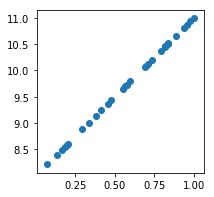

In [7]:
plt.scatter(x, y)

In [8]:
def sse(y, y_pred): return ((y - y_pred)**2).sum() #sum of squared errors
def loss(y, a, b, x): return sse(y, lin(a, b, x)) #loss function: high is guess is bad, low if guess is good
def avg_loss(y, a, b, x): return np.sqrt(loss(y, a, b, x) / n)

In [9]:
a_guess = -1.0
b_guess = 1.0
avg_loss(y, a_guess, b_guess, x)

9.3719

In [10]:
lr = 0.01 #want to use the highest amount you can get away with
# d[(y-(a * x + b))**2, b] = 2 (b + a x - y) = 2 (y_pred - y) (derivative using wolfgram alpha)
# d[(y-(a * x + b))**2, a] = 2 x (b + a x - y) = x * dy/db (derivative using wolfgram alpha)

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y) #as "b" increases by 1, the sum of squared errors for "b" will change by this amount
    dyda = x * dydb #as "a" increases by 1, the sum of squared errors for "a" will change by this amount
    #so if "dyba" is 3 (my loss function for "a" gets higher by 3 if "a" is increased by 1), need to make "a" a little bit 
    #smaller, as if "a" gets smaller, the loss function will go down
    a_guess -= lr * dyda.mean() #adjust the guess by a small amount of the derivative, making it a little bit better
    b_guess -= lr * dydb.mean() #adjust the guess by a small amount of the derivative, making it a little bit better

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x, y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10): upd()
    return i,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

RuntimeError: No MovieWriters available!